In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np


In [45]:
# Load the data into a pandas DataFrame
df = pd.read_csv('scholarship_dataset.csv')
# Normalize the "Status" column by homogenizing different spellings to the same value
df['Status'] = df['Status'].replace(['Concedida', 'CONCEDIDA'], 1)
df['Status'] = df['Status'].replace(['EXCLUIDA', 'EXCLUIDO', 'Excluido'], 0)

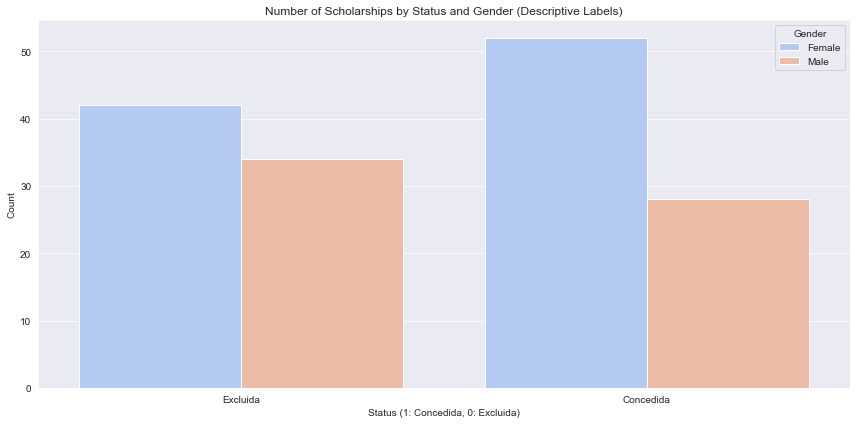

In [46]:
# Replace gender numeric codes with descriptive labels
df['Gender'] = df['Gender'].replace(0, 'Female')
df['Gender'] = df['Gender'].replace(1, 'Male')

# Recreate the graph with gender labels
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Status', hue='Gender', palette='coolwarm')
plt.title('Number of Scholarships by Status and Gender (Descriptive Labels)')
plt.xlabel('Status (1: Concedida, 0: Excluida)')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks([0, 1], ['Excluida', 'Concedida'])  # Rename x-ticks for clarity
plt.tight_layout()

# Show the plot with gender labels
plt.show()

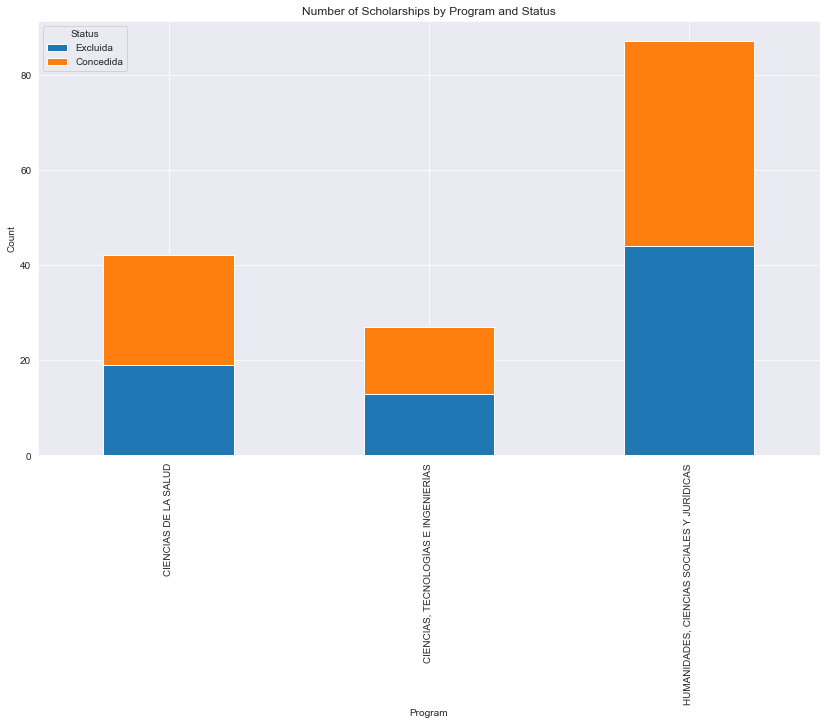

In [47]:
# Perform the groupby operation and plot the results directly
grouped_data = df.groupby(['Program', 'Status']).size()

# Plotting the result
grouped_data_plot = grouped_data.unstack().plot(kind='bar', stacked=True, figsize=(14, 8))
grouped_data_plot.set_title('Number of Scholarships by Program and Status')
grouped_data_plot.set_xlabel('Program')
grouped_data_plot.set_ylabel('Count')
grouped_data_plot.legend(title='Status', labels=['Excluida', 'Concedida'])

# Display the plot
plt.show()

In [48]:
# Load the data into a pandas DataFrame
df = pd.read_csv('scholarship_dataset.csv')
# Drop the 'TOTAL' column from the DataFrame
df.drop(columns=['TOTAL'], inplace=True)
df.head()

,Gender,Program,EA,AL,PC,PT,AE,EComplete,IncorrectDuration,SIncomplete,Less60,Status
0,0,CIENCIAS DE LA SALUD,26.73,3.0,13.32,20,20,1,1,0,0,CONCEDIDA
1,0,CIENCIAS DE LA SALUD,25.84,2.0,12.00,20,20,1,1,0,0,CONCEDIDA
2,0,CIENCIAS DE LA SALUD,26.91,2.0,4.50,20,20,1,1,0,0,CONCEDIDA
3,0,CIENCIAS DE LA SALUD,25.22,2.0,9.32,20,16,1,1,0,0,CONCEDIDA
4,1,CIENCIAS DE LA SALUD,23.81,2.0,16.66,20,20,1,1,0,0,EXCLUIDA


In [49]:
# Normalize the "Status" column
df['Status'] = df['Status'].replace(['Concedida', 'CONCEDIDA'], 1)
df['Status'] = df['Status'].replace(['EXCLUIDA', 'EXCLUIDO', 'Excluido'], 0)

# Codify the "Program" column by converting it to categorical and then to numeric codes
df['Program'] = df['Program'].astype('category')
df['Program_code'] = df['Program'].cat.codes
df.head()

,Gender,Program,EA,AL,PC,PT,AE,EComplete,IncorrectDuration,SIncomplete,Less60,Status,Program_code
0,0,CIENCIAS DE LA SALUD,26.73,3.0,13.32,20,20,1,1,0,0,1,0
1,0,CIENCIAS DE LA SALUD,25.84,2.0,12.00,20,20,1,1,0,0,1,0
2,0,CIENCIAS DE LA SALUD,26.91,2.0,4.50,20,20,1,1,0,0,1,0
3,0,CIENCIAS DE LA SALUD,25.22,2.0,9.32,20,16,1,1,0,0,1,0
4,1,CIENCIAS DE LA SALUD,23.81,2.0,16.66,20,20,1,1,0,0,0,0


In [50]:
# Extract the unique codes assigned to each program along with their names
program_codes = df[['Program', 'Program_code']].drop_duplicates().sort_values(by='Program_code')
program_codes


,Program,Program_code
0,CIENCIAS DE LA SALUD,0
61,"CIENCIAS, TECNOLOGÍAS E INGENIERÍAS",1
22,"HUMANIDADES, CIENCIAS SOCIALES Y JURÍDICAS",2


In [51]:
# Remove the 'Program' column
df.drop(columns=['Program'], inplace=True)

# Prepare features and target variable
X = df.drop(columns=['Status'])
y = df['Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
tree = DecisionTreeClassifier()

# Grid Search parameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(3, 15),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Apply GridSearchCV
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'criterion': 'gini',
  'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 0.6700000000000002)

In [52]:
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Build the model with the best parameters found
model = DecisionTreeClassifier(criterion='gini', max_depth=11, min_samples_leaf=1, min_samples_split=2)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Save the model
model_filename = 'decision_tree_scholarship_model.joblib'
joblib.dump(model, model_filename)
print("Model saved as:", model_filename)

Accuracy: 0.65625
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.58      0.56        12
           1       0.74      0.70      0.72        20

    accuracy                           0.66        32
   macro avg       0.64      0.64      0.64        32
weighted avg       0.66      0.66      0.66        32

Model saved as: decision_tree_scholarship_model.joblib


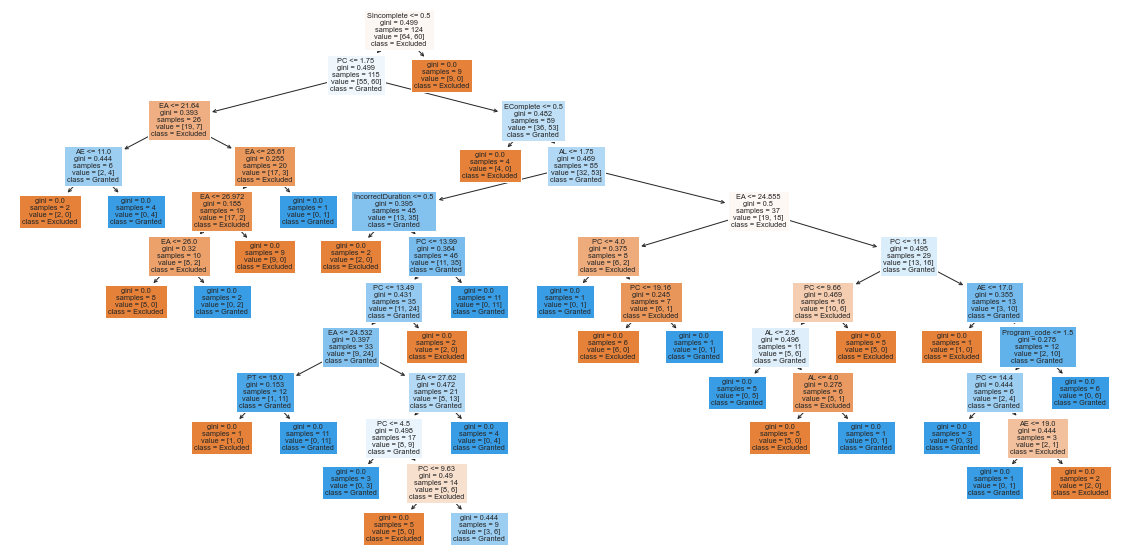

In [53]:
from sklearn.tree import plot_tree
# Load the Decision Tree model
model_path = 'decision_tree_scholarship_model.joblib'
tree_model = joblib.load(model_path)

# Plot the full decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=['Excluded', 'Granted'])
#plt.title('Decision Tree for Scholarship Status Prediction')
plt.savefig('full_decision_tree_structure.pdf', format="pdf", bbox_inches="tight")
plt.show()

Fairness evaluation -> Statistical Parity Difference

In [54]:
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric

y_results = model.predict(X_test)
df_results = X_test.copy()
df_results['Status'] = y_results

# Create a BinaryLabelDataset for use with AIF360
aif360_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=df_results,
    label_names=['Status'],
    protected_attribute_names=['Gender']
)

# Compute the Statistical Parity Difference
metric = BinaryLabelDatasetMetric(aif360_dataset,
                                  unprivileged_groups=[{'Gender': 0}],
                                  privileged_groups=[{'Gender': 1}])

statistical_parity_difference = metric.statistical_parity_difference()
statistical_parity_difference

0.16666666666666663

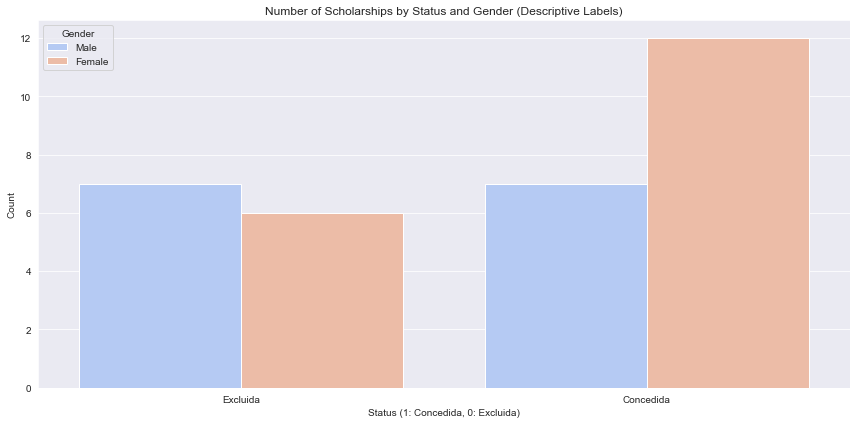

In [55]:
# Replace gender numeric codes with descriptive labels
df_results['Gender'] = df_results['Gender'].replace(0, 'Female')
df_results['Gender'] = df_results['Gender'].replace(1, 'Male')

# Recreate the graph with gender labels
plt.figure(figsize=(12, 6))
sns.countplot(data=df_results, x='Status', hue='Gender', palette='coolwarm')
plt.title('Number of Scholarships by Status and Gender (Descriptive Labels)')
plt.xlabel('Status (1: Concedida, 0: Excluida)')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks([0, 1], ['Excluida', 'Concedida'])  # Rename x-ticks for clarity
plt.tight_layout()

# Show the plot with gender labels
plt.show()

Local explanation

In [56]:
import lime
from lime.lime_tabular import LimeTabularExplainer
# Initialize the LIME Explainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['Excluded', 'Granted'],
    mode='classification'
)

# Select an instance to explain
instance_index = 1  # Change this index as needed
instance = X_test.iloc[instance_index]

# Explain the prediction
explanation = explainer.explain_instance(
    data_row=instance,
    predict_fn=model.predict_proba
)

# Display the explanation
explanation.show_in_notebook(show_table=True)

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


Global explanation

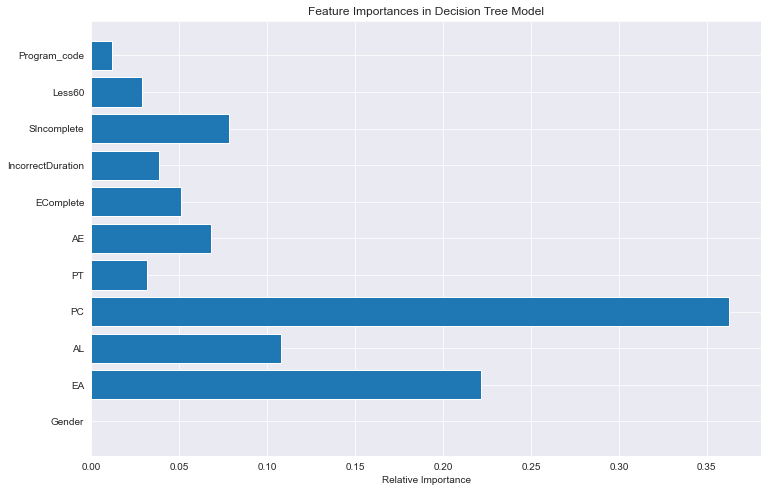

In [29]:
import matplotlib.pyplot as plt

# Assuming 'model' is your trained Decision Tree model
feature_importances = model.feature_importances_

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), X_train.columns)
plt.xlabel('Relative Importance')
plt.title('Feature Importances in Decision Tree Model')
plt.show()

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


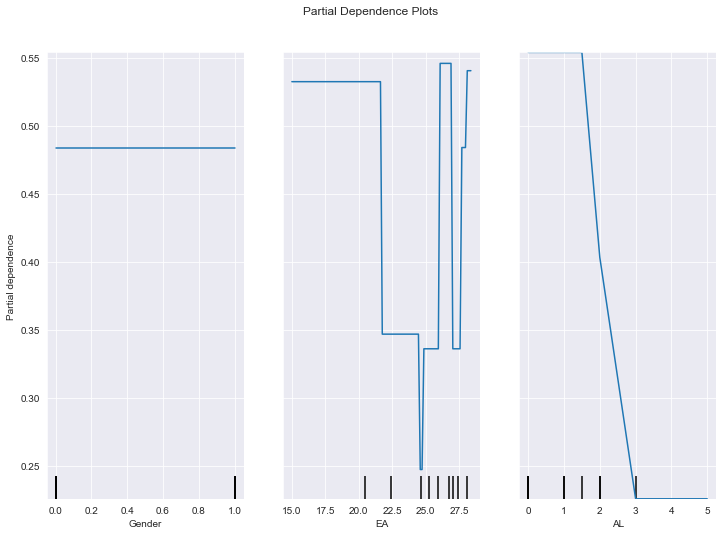

In [30]:
from sklearn.inspection import plot_partial_dependence
# Partial dependence plots show the dependence between the target response and a set of 'features of interest', marginalizing over the values of all other features. They can show whether the relationship between the target and a feature is linear, monotonic, or more complex.
fig, ax = plt.subplots(figsize=(12, 8))
plot_partial_dependence(model, X_train, features=[0, 1, 2], feature_names=X_train.columns, ax=ax)  # replace [0, 1, 2] with indices of features of interest
plt.suptitle("Partial Dependence Plots")
plt.subplots_adjust(top=0.9)  # Adjust the title to not overlap with plots
plt.show()

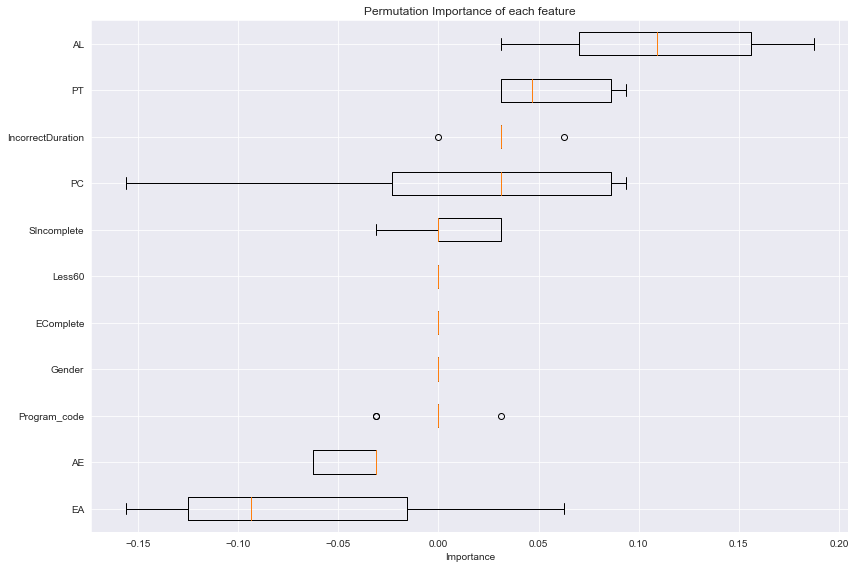

In [31]:
from sklearn.inspection import permutation_importance
# This method involves shuffling individual variables in the validation set (leaving the others unchanged) to see how much the prediction error increases. An increase in error indicates that the model relied on the feature for the prediction.
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(12, 8))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
plt.title("Permutation Importance of each feature")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

The SHAP (SHapley Additive exPlanations) values plot offers a powerful visual method to understand how each feature in your dataset contributes to the model’s predictions, based on the concept from cooperative game theory known as Shapley values.



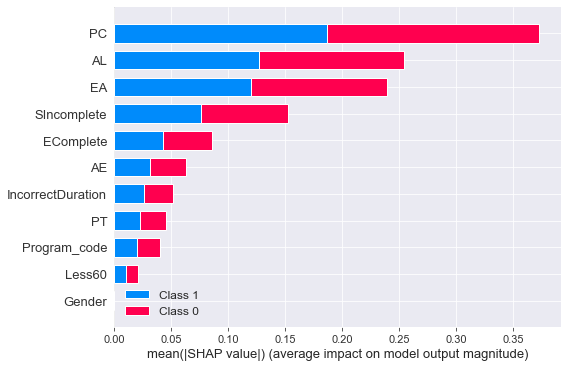

In [32]:
import shap
# SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory.
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Plot SHAP values
shap.summary_plot(shap_values, X_train, plot_type="bar")

Counterfactual explanations

In [33]:
import pandas as pd
import dice_ml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import joblib


# Assuming you have already trained and saved a decision tree model:
model = joblib.load('decision_tree_scholarship_model.joblib')  # Update the path

# Create a DiCE data object
d = dice_ml.Data(dataframe=pd.concat([X_train, y_train], axis=1),
                 continuous_features=list(X_train.columns),
                 outcome_name='Status')

# Create a DiCE model object from the sklearn model
backend = 'sklearn'  # DiCE supports multiple backends like TF2, PyTorch, and sklearn
m = dice_ml.Model(model=model, backend=backend)

# Create a DiCE explainability object
exp = dice_ml.Dice(d, m)

# Generate counterfactual explanations
query_instance = X_test.iloc[0].to_dict()  # Select a sample from your data
counterfactuals = exp.generate_counterfactuals(query_instance, total_CFs=3, desired_class="opposite")

# Visualize the counterfactual explanations
print(counterfactuals.visualize_as_dataframe(show_only_changes=True))


ModuleNotFoundError: No module named 'dice_ml'

In [ ]:
import alibi
from alibi.explainers import AnchorTabular
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Initialize and fit the explainer
explainer = AnchorTabular(predict_fn=model.predict, feature_names=X_train.columns)
explainer.fit(X_train.values, disc_perc=[25, 50, 75])  # discretize the continuous features

# Explain a prediction
idx = 1  # Index of instance to explain
instance = X_test.values[idx]
explanation = explainer.explain(instance, threshold=0.95)  # Set the precision threshold

print('Prediction:', model.predict([instance])[0])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Fair explanations

In [43]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'X_train' is your training dataset and 'model' is your trained model
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Assuming 'gender' is a column in X_train representing the sensitive attribute
female_indices = X_train[X_train['Gender'] == 0].index
male_indices = X_train[X_train['Gender'] == 1].index

female_indices = female_indices.to_list()
male_indices = male_indices.to_list()

# Calculate mean absolute SHAP values for each group
female_shap = np.abs(shap_values[female_indices]).mean(axis=0)
male_shap = np.abs(shap_values[male_indices]).mean(axis=0)

# Plot comparison
fig, ax = plt.subplots()
index = np.arange(len(X_train.columns))
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, female_shap, bar_width, alpha=opacity, color='b', label='Female')
rects2 = plt.bar(index + bar_width, male_shap, bar_width, alpha=opacity, color='r', label='Male')

plt.xlabel('Features')
plt.ylabel('Mean |SHAP value|')
plt.title('Comparison of Feature Importance by Gender')
plt.xticks(index + bar_width / 2, X_train.columns)
plt.legend()

plt.tight_layout()
plt.show()


TypeError: list indices must be integers or slices, not list

In [40]:
(X_train[X_train['Gender'] == 0].index).to_list()

[56,
 138,
 123,
 128,
 127,
 66,
 26,
 79,
 22,
 135,
 11,
 118,
 41,
 32,
 85,
 122,
 65,
 16,
 10,
 149,
 0,
 81,
 40,
 25,
 23,
 84,
 142,
 47,
 112,
 73,
 33,
 143,
 145,
 62,
 53,
 5,
 108,
 126,
 49,
 35,
 80,
 77,
 34,
 7,
 113,
 91,
 83,
 140,
 141,
 89,
 13,
 133,
 3,
 17,
 38,
 136,
 100,
 2,
 120,
 54,
 48,
 21,
 57,
 150,
 129,
 37,
 146,
 1,
 52,
 99,
 116,
 74,
 155,
 20,
 14,
 102]